###1.ANN Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

###a)Load and preprocess the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###b)Define the architecture

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model

<Sequential name=sequential, built=True>

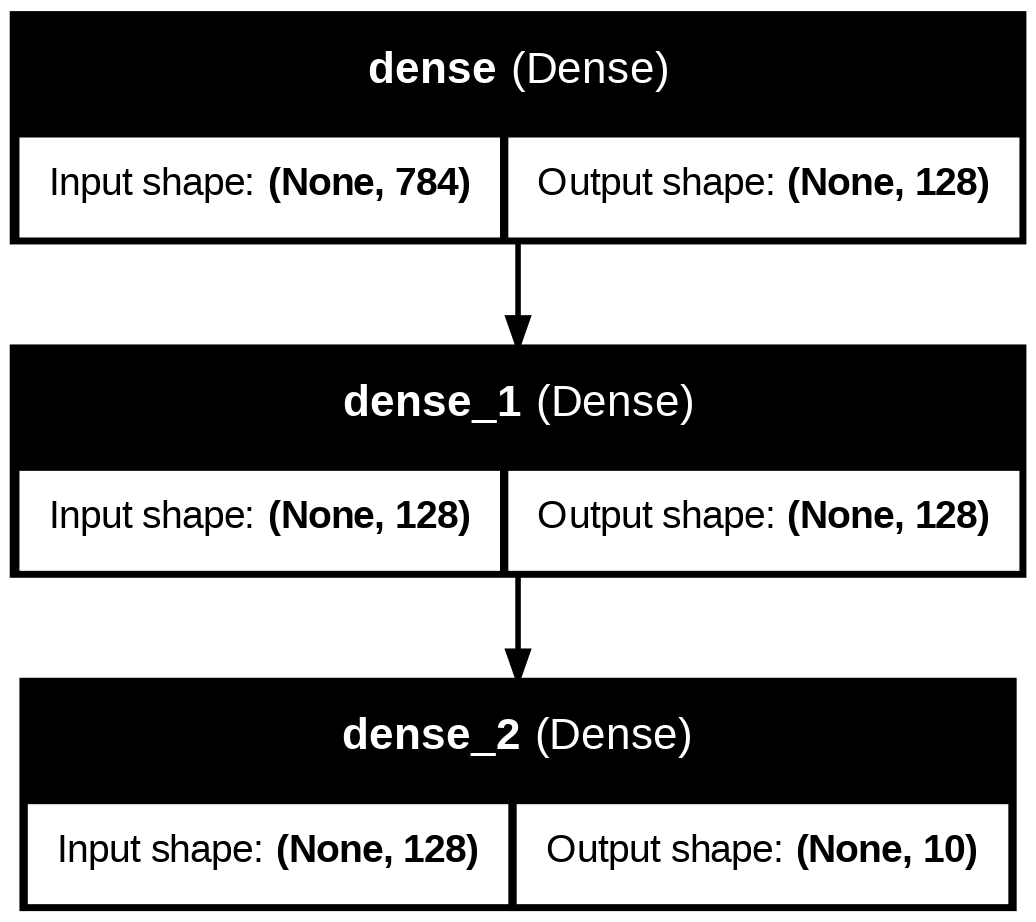

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

###c)Compile The Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 1
import os
import datetime
#2
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs/20241022-184619


###d)Train The Model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8819 - loss: 0.3999 - val_accuracy: 0.9661 - val_loss: 0.1132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9704 - loss: 0.0982 - val_accuracy: 0.9746 - val_loss: 0.0812
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9787 - loss: 0.0673 - val_accuracy: 0.9712 - val_loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9831 - loss: 0.0519 - val_accuracy: 0.9803 - val_loss: 0.0658
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9779 - val_loss: 0.0798
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0261 - val_accuracy: 0.9698 - val_loss: 0.1119
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0208

###e)Evalute the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9757 - loss: 0.1063
Test accuracy: 0.9793000221252441


###2)CNN IMPLEMENTATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

###a)Load and preprocess

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

###b)Define the CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###c)Compile The Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

###d)Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 157ms/step - accuracy: 0.3457 - loss: 1.7968 - val_accuracy: 0.5497 - val_loss: 1.2905
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.5496 - loss: 1.2679 - val_accuracy: 0.5849 - val_loss: 1.1751
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.6181 - loss: 1.0926 - val_accuracy: 0.6102 - val_loss: 1.1341
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - accuracy: 0.6487 - loss: 1.0074 - val_accuracy: 0.6531 - val_loss: 1.0023
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 155ms/step - accuracy: 0.6800 - loss: 0.9231 - val_accuracy: 0.6684 - val_loss: 0.9552
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - accuracy: 0.7039 - loss: 0.8539 - val_accuracy: 0.6719 - val_loss: 0.9537
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.7215 - loss: 0.8026 - val_accuracy: 0.6865 - val_loss: 0.9273
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.7385 - loss: 0

###e)Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7084 - loss: 0.8603
Test accuracy: 0.7059000134468079


###f)Visualization

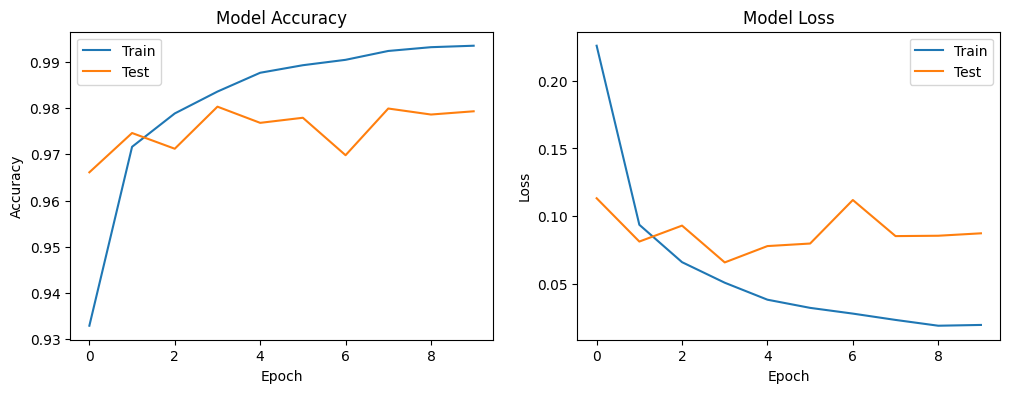

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])


plt.show()